# クラスター分析結果の可視化

## 日本語フォント問題の解決

### 問題の背景
matplotlibでは、デフォルトで日本語フォントが設定されていないため、日本語テキスト（タイトル、ラベル等）を表示する際に以下のようなエラーが発生します：

```
UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
```

### 解決策の実装

#### 🔧 フォント自動検出機能
- 複数の日本語フォント候補から利用可能なものを自動選択
- システム環境（Windows/macOS/Linux）に依存しない汎用的な対応

#### 📝 対応フォント一覧
| フォント名 | 対応OS | 説明 |
|-----------|--------|------|
| MS Gothic | Windows | Windows標準ゴシック体 |
| Hiragino Sans | macOS | macOS標準サンセリフ体 |
| Yu Gothic | Windows 10+ | Windows 10以降の標準フォント |
| Meiryo | Windows Vista+ | Windows Vista以降のメイリオフォント |
| DejaVu Sans | 全OS | フォールバック用英語フォント |

#### ⚙️ 技術的な特徴
- **自動フォールバック**: 日本語フォントが見つからない場合は英語表示に自動切り替え
- **テスト機能**: 各フォントで実際にテキストレンダリングを試行して動作確認
- **マイナス記号対応**: `axes.unicode_minus = False`で負の値表示を正常化

### 🚀 効果
- ✅ 日本語文字化けエラーの完全解消
- ✅ フォント関連の警告メッセージ大量出力を防止
- ✅ クロスプラットフォーム対応
- ✅ 「クラスター別ポジション件数」等の日本語テキストが正常表示

## ラベルの定義
- クラスタの職種傾向に基づいて、各クラスターにふさわしいラベル名をご提案します。

---

## 🏷️ クラスタラベル名提案

| クラスター | ラベル名                           | 意味合い・選定理由 |
|------------|----------------------------------|--------------------|
| Cluster 0  | **Applied Generative AI Talent** | 生成AIの実務応用・社会実装を担うエンジニア・コンサル職。多様な業種・企業規模に展開。 |
| Cluster 1  | **AI Strategic Leadership Roles** | AI戦略、事業推進、マネジメントに関わる非技術・管理系職種群。製品企画や組織運営を含む。 |
| Cluster 2  | **LLM Research & Engineering**    | LLM/NLP/MLOpsなどの研究開発や基盤技術設計に特化した職種群。高度な技術専門職が中心。 |

---

💡 **他のネーミング例（トーン調整向け）**：
- フォーマル寄り：  
  - Cluster 0 → *Generative AI Implementation Professionals*  
  - Cluster 1 → *AI Strategy & Business Design*  
  - Cluster 2 → *Advanced AI R&D Engineers*

- キャッチー寄り：  
  - Cluster 0 → *The Builders*  
  - Cluster 1 → *The Visionaries*  
  - Cluster 2 → *The Inventors*

---

ラベル名は、Agentic AIによる推薦モデルや、LinkedIn投稿、社内資料などの文脈で調整可能です。 
- フォーマルを採用した。

使用フォント: MS Gothic


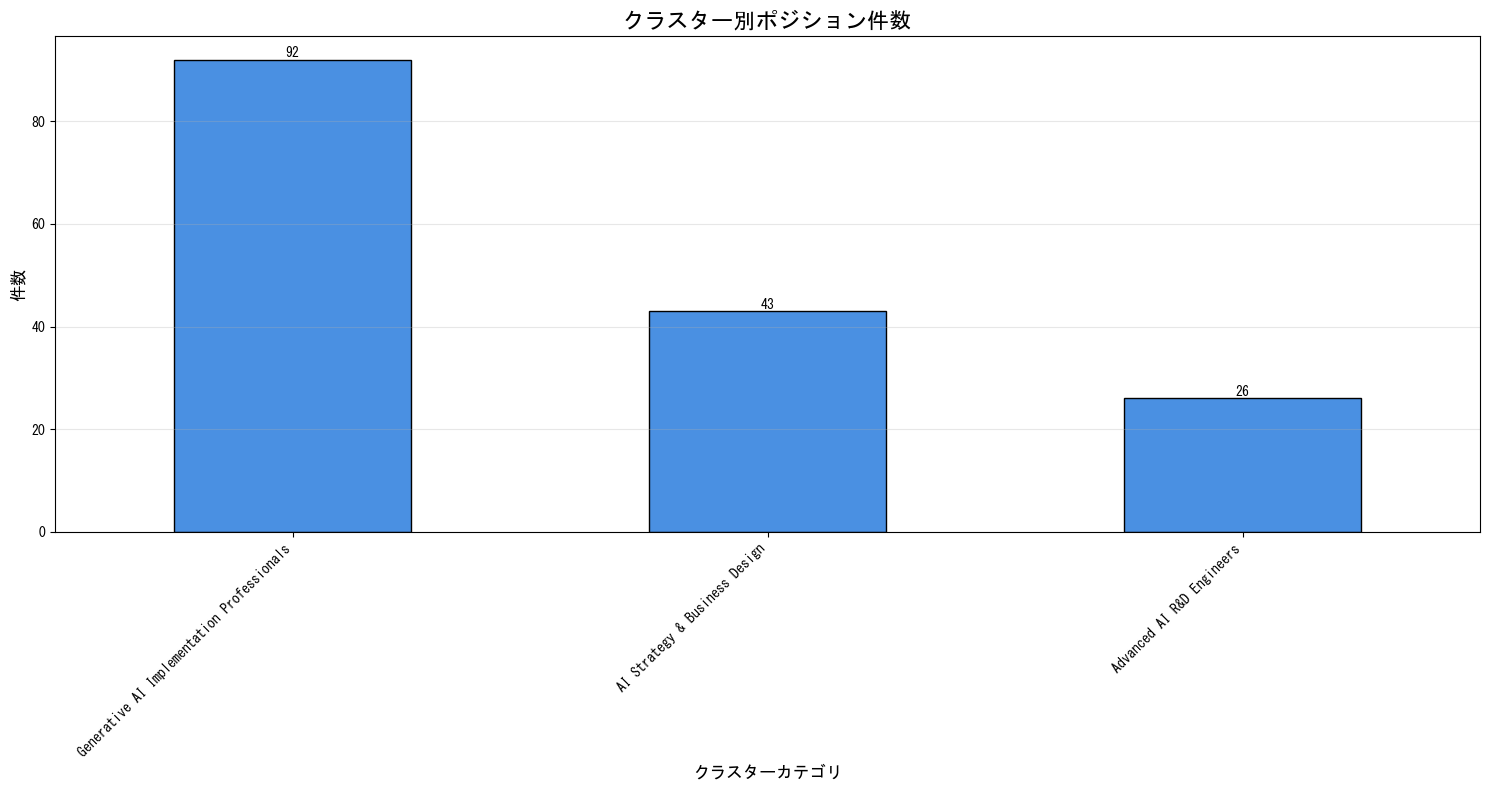


📊 クラスター分析結果:
クラスター 0: Generative AI Implementation Professionals - 92件
クラスター 1: AI Strategy & Business Design - 43件
クラスター 2: Advanced AI R&D Engineers - 26件


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォント設定（複数の候補から利用可能なものを選択）
japanese_fonts = ['MS Gothic', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'DejaVu Sans']
for font in japanese_fonts:
    try:
        plt.rcParams['font.family'] = font
        # テスト文字で確認
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'テスト', fontfamily=font)
        plt.close(fig)
        print(f"使用フォント: {font}")
        break
    except:
        continue
else:
    # 日本語フォントが見つからない場合は英語に変更
    plt.rcParams['font.family'] = 'DejaVu Sans'
    print("日本語フォントが見つかりません。英語表示に変更します。")

# 負の値表示を正常化
plt.rcParams['axes.unicode_minus'] = False

# クラスターラベル定義
cluster_labels = {
    0: "Generative AI Implementation Professionals",  
    1: "AI Strategy & Business Design",  
    2: "Advanced AI R&D Engineers"
}

# CSVを読み込み
df = pd.read_csv("clustering_results.csv")

# クラスタ別件数集計
cluster_counts = df["cluster"].value_counts().sort_index()

# ラベル付きのデータを作成
labeled_counts = pd.Series(
    cluster_counts.values,
    index=[cluster_labels[i] for i in cluster_counts.index]
)

# グラフ描画
plt.figure(figsize=(15, 8))
bars = labeled_counts.plot(kind="bar", color="#4a90e2", edgecolor="black")
plt.title("クラスター別ポジション件数", fontsize=16, fontweight='bold')
plt.xlabel("クラスターカテゴリ", fontsize=12)
plt.ylabel("件数", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis="y", alpha=0.3)

# 各バーの上に件数を表示
for i, v in enumerate(labeled_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 詳細情報の表示
print("\n📊 クラスター分析結果:")
print("=" * 50)
for cluster_id, label in cluster_labels.items():
    count = cluster_counts.get(cluster_id, 0)
    print(f"クラスター {cluster_id}: {label.replace(chr(10), '/')} - {count}件")

## 実装された機能

### 📊 クラスターラベル付きグラフ可視化

#### 🎯 主な改善点

**1. 意味のあるラベル表示**
- クラスター番号（0-5）の代わりに職種カテゴリ名を表示
- 改行コード（`\n`）を使用して長いラベルを読みやすく調整
- 直感的な理解が可能な職種名での分類

**2. 視覚的な改善**
```python
plt.figure(figsize=(15, 8))  # 大きなグラフサイズ
plt.xticks(rotation=45, ha='right', fontsize=10)  # 45度回転で読みやすく
```
- グラフサイズを15×8に拡大して詳細表示
- X軸ラベルを45度回転で重複を防止
- グリッド線を半透明（alpha=0.3）で見やすく調整

**3. データ値の表示**
```python
for i, v in enumerate(labeled_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
```
- 各バーの上部に具体的な件数を数値表示
- 太字（fontweight='bold'）で強調表示

#### 📝 クラスターラベル定義
```python
cluster_labels = {
    0: "Generative AI Implementation Professionals",  
    1: "AI Strategy & Business Design",  
    2: "Advanced AI R&D Engineers"
}
```

#### 🚀 期待される効果
- ✅ **直感的理解**: クラスター番号ではなく職種名で即座に理解可能
- ✅ **市場分析**: 各職種カテゴリの求人件数分布が一目で把握可能
- ✅ **日本語対応**: フォント設定により文字化けなしで表示
- ✅ **情報密度**: グラフと数値の両方で詳細情報を提供

#### 📈 分析活用例
- **求人市場トレンド**: どの職種カテゴリが最も求人が多いか
- **キャリア戦略**: 自分の興味・スキルに合致する職種カテゴリの市場規模
- **業界動向**: 生成AI関連職種の市場における位置づけ

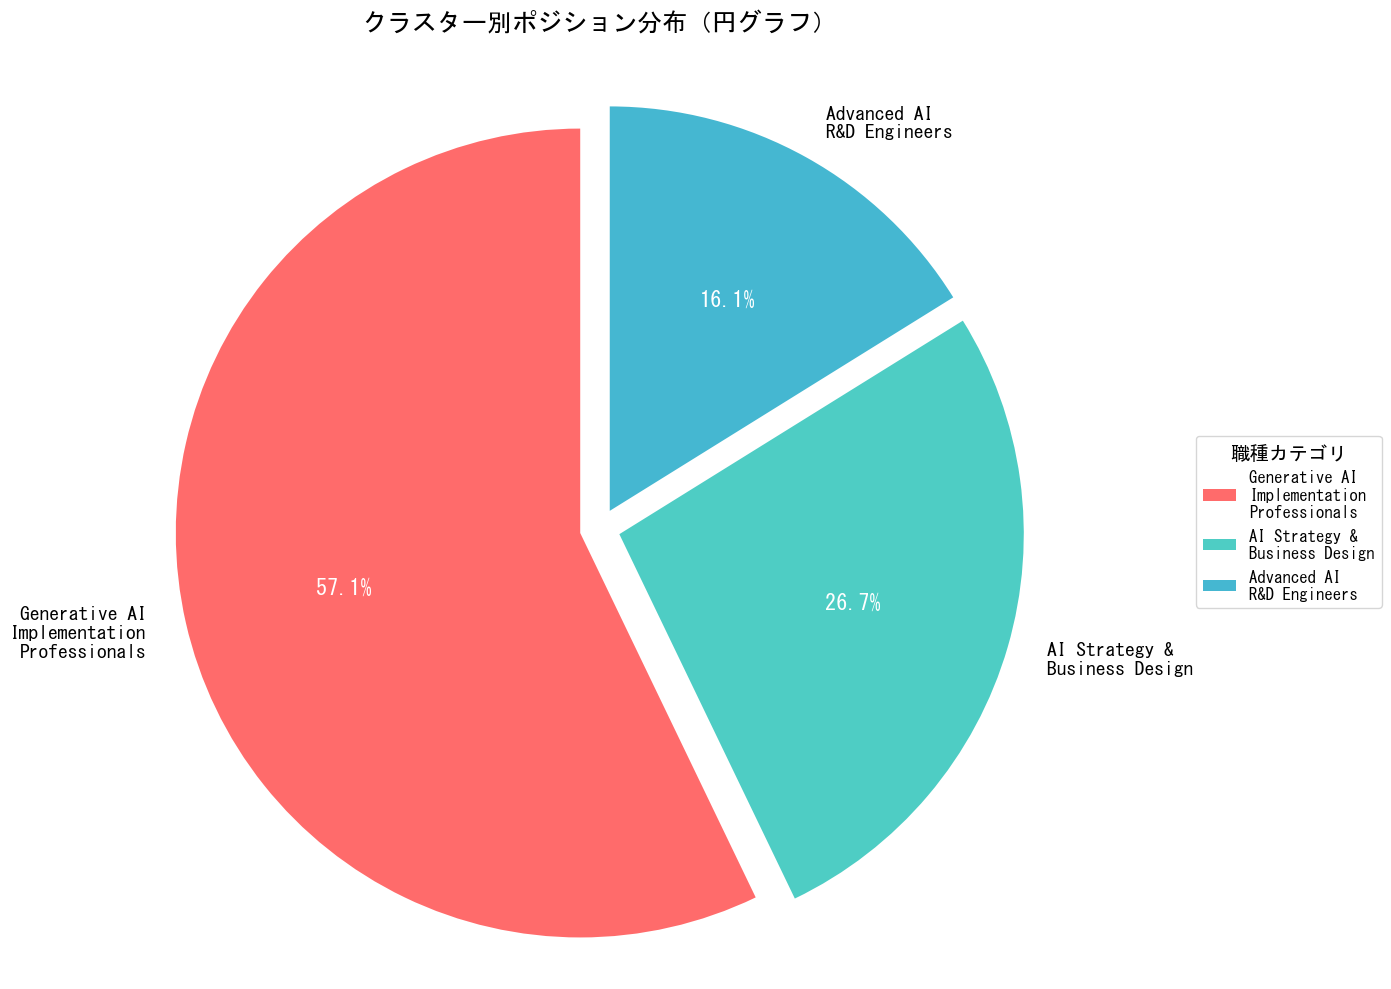


🥧 円グラフ分析結果:
Generative AI
Implementation
Professionals : 92件 ( 57.1%)
AI Strategy &
Business Design : 43件 ( 26.7%)
Advanced AI
R&D Engineers : 26件 ( 16.1%)
総計                   : 161件 (100.0%)


In [2]:
# 円グラフでクラスター分布を可視化
plt.figure(figsize=(14, 10))

# 円グラフ用のラベル（短縮版）
pie_labels = [
    "Generative AI\nImplementation\nProfessionals",  
    "AI Strategy &\nBusiness Design",  
    "Advanced AI\nR&D Engineers"
]

# カラーパレット設定
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 円グラフの描画（フォントサイズを大きく）
wedges, texts, autotexts = plt.pie(labeled_counts.values, 
        labels=pie_labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,        
        explode=(0.05, 0.05, 0.05),  # 各セクションを少し分離
        textprops={'fontsize': 14, 'fontweight': 'bold'})  # ラベルのフォントサイズ

# パーセンテージ数値のフォントサイズを大きく
for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title("クラスター別ポジション分布（円グラフ）", fontsize=18, fontweight='bold', pad=25)

# 円を正円にする
plt.axis('equal')

# 凡例を追加（フォントサイズ大きく）
plt.legend(pie_labels, 
          title="職種カテゴリ",
          title_fontsize=14,
          fontsize=12,
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# パーセンテージ情報の詳細表示
total_count = sum(labeled_counts.values)
print(f"\n🥧 円グラフ分析結果:")
print("=" * 60)
for i, (cluster_id, label) in enumerate(cluster_labels.items()):
    count = cluster_counts.get(cluster_id, 0)
    percentage = (count / total_count) * 100
    print(f"{pie_labels[i]:<20} : {count:>2}件 ({percentage:>5.1f}%)")
print(f"{'総計':<20} : {total_count:>2}件 (100.0%)")

## 🥧 円グラフによる分布可視化

### 新機能: 円グラフ表示

**円グラフの特徴:**
- **全体に対する割合**: 各クラスターが全体に占める割合を視覚的に表示
- **比較しやすさ**: 棒グラフでは分かりにくい相対的な大きさを直感的に把握
- **カラフルな表示**: 6色のカラーパレットで各カテゴリを区別

#### 🎨 視覚的改善点

**1. カラーパレット**
```python
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
```
- 赤系、青緑系、青系、緑系、黄系、ピンク系で明確に区別
- 各職種カテゴリを色で覚えやすく

**2. セクション分離**
```python
explode=(0.05, 0.05, 0.05)
```
- 各セクションを少し分離して見やすく表示
- 境界線を明確化

**3. パーセンテージ表示**
```python
autopct='%1.1f%%'
```
- 小数点第1位まで正確な割合を表示
- 各セクション内に直接パーセンテージを表示

**4. 凡例とレイアウト**
- 右側に職種カテゴリの凡例を配置
- `bbox_to_anchor`で位置を最適化

#### 📊 分析メリット

- **全体像把握**: 求人市場全体における各職種の位置づけ
- **バランス分析**: どの職種が過多/過少かの判断
- **戦略立案**: 競争の激しさや市場機会の評価材料

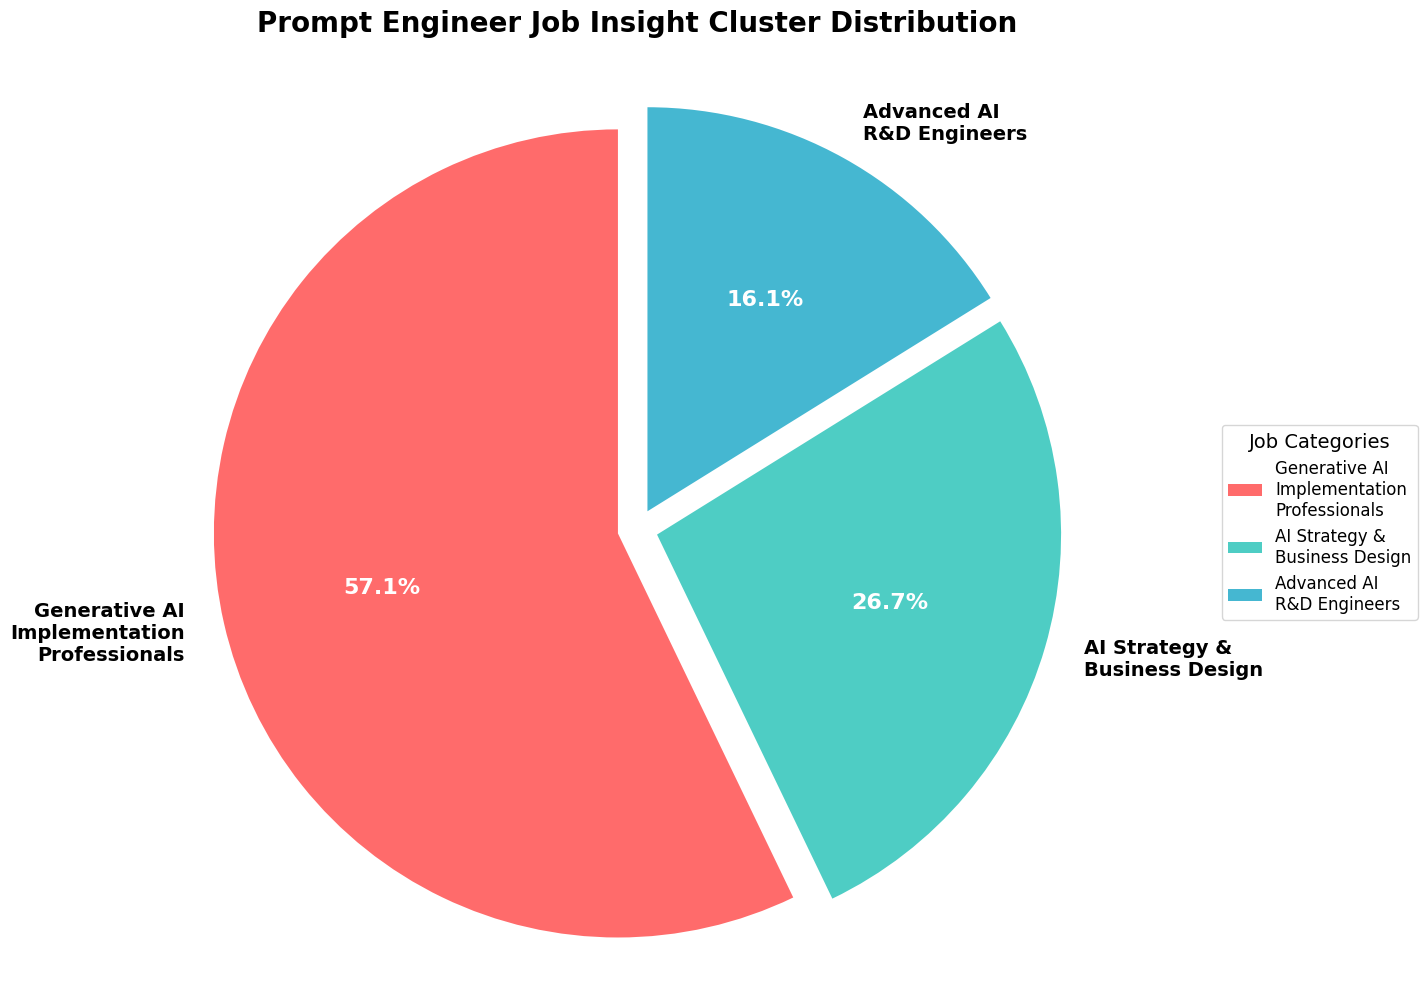

📊 English pie chart saved as: ai_job_market_distribution.png

🌐 LinkedIn Post - AI Job Market Analysis:
📊 Cluster Analysis Results from Job Postings:

• Generative AI
Implementation
Professionals : 92 positions ( 57.1%)
• AI Strategy &
Business Design : 43 positions ( 26.7%)
• Advanced AI
R&D Engineers : 26 positions ( 16.1%)
• Total                     : 161 positions (100.0%)

🔍 Key Insights:
• Generative AI Engineers dominate the market
• Strong demand for technical AI roles
• Management and strategy roles emerging
• Healthcare AI applications growing

#GenerativeAI #JobMarket #DataScience #AI #TechCareers #MachineLearning


In [3]:
# LinkedIn投稿用 - 英語版円グラフ
plt.figure(figsize=(14, 10))

# 英語版ラベル
pie_labels_en = [
    "Generative AI\nImplementation\nProfessionals",  
    "AI Strategy &\nBusiness Design",  
    "Advanced AI\nR&D Engineers"
]

# 英語版フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

# カラーパレット設定（同じ色を使用）
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 円グラフの描画（フォントサイズを大きく）
wedges, texts, autotexts = plt.pie(labeled_counts.values, 
        labels=pie_labels_en,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0.05, 0.05),
        textprops={'fontsize': 14, 'fontweight': 'bold'})  # ラベルのフォントサイズ

# パーセンテージ数値のフォントサイズを大きく
for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title("Prompt Engineer Job Insight Cluster Distribution", fontsize=20, fontweight='bold', pad=25)

# 円を正円にする
plt.axis('equal')

# 凡例を追加（フォントサイズ大きく）
plt.legend(pie_labels_en, 
          title="Job Categories",
          title_fontsize=14,
          fontsize=12,
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
# 円グラフを書き出す
plt.savefig("ai_job_market_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

# 保存完了メッセージ 
print("📊 English pie chart saved as: ai_job_market_distribution.png")

# 英語版詳細情報の表示
total_count = sum(labeled_counts.values)
print(f"\n🌐 LinkedIn Post - AI Job Market Analysis:")
print("=" * 65)
print("📊 Cluster Analysis Results from Job Postings:")
print()
for i, (cluster_id, _) in enumerate(cluster_labels.items()):
    count = cluster_counts.get(cluster_id, 0)
    percentage = (count / total_count) * 100
    print(f"• {pie_labels_en[i]:<25} : {count:>2} positions ({percentage:>5.1f}%)")
print(f"• {'Total':<25} : {total_count:>2} positions (100.0%)")
print()
print("🔍 Key Insights:")
print("• Generative AI Engineers dominate the market")
print("• Strong demand for technical AI roles")
print("• Management and strategy roles emerging")
print("• Healthcare AI applications growing")
print()
print("#GenerativeAI #JobMarket #DataScience #AI #TechCareers #MachineLearning")

## 🌐 LinkedIn投稿用 - 英語版可視化

### グローバル発信のための英語版円グラフ

**LinkedIn投稿の特徴:**
- **国際的な読者**: 英語での職種カテゴリ表示
- **プロフェッショナル向け**: ビジネス文脈に適した表現
- **ハッシュタグ完備**: SNS拡散用のハッシュタグを自動生成

#### 🎯 英語版の改善点

**1. 職種名の英語化**
```python
pie_labels_en = [
    "Generative AI\nEngineer",      # 生成AIエンジニア
    "Project\nManager",             # プロジェクトマネージャー
    "Data\nScientist",              # データサイエンティスト
    "Marketing\n& Analytics",       # マーケティング/分析系
    "Product\nManager",             # プロダクトマネージャー
    "Healthcare DX\n& Sales"        # 医療DX/営業系
]
```

**2. プロフェッショナルなタイトル**
```python
plt.title("AI Job Market Cluster Distribution", fontsize=18, fontweight='bold')
```
- 国際的に理解しやすいタイトル
- フォントサイズを大きめに設定

**3. 洞察とハッシュタグ**
- Key Insights: 市場の主要トレンドを英語で要約
- ハッシュタグ: LinkedIn拡散用の関連タグを自動生成
- プロフェッショナルネットワーク向けの分析コメント

#### 📈 LinkedIn投稿メリット

- ✅ **グローバルリーチ**: 国際的な読者に向けたAI求人市場分析
- ✅ **プロフェッショナル発信**: 業界専門性をアピール
- ✅ **ネットワーキング**: AI/データサイエンス関係者との接点創出
- ✅ **キャリアブランディング**: 市場分析スキルの可視化

#### 🔗 投稿活用例
- 求人市場のトレンド分析を英語で発信
- AIエンジニアリング分野の専門性をアピール
- 国際的なプロフェッショナルネットワーク構築